In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Load MNIST dataset**

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")

Training set: (60000, 28, 28), Labels: (60000,)
Test set: (10000, 28, 28), Labels: (10000,)


**Visualize sample images**

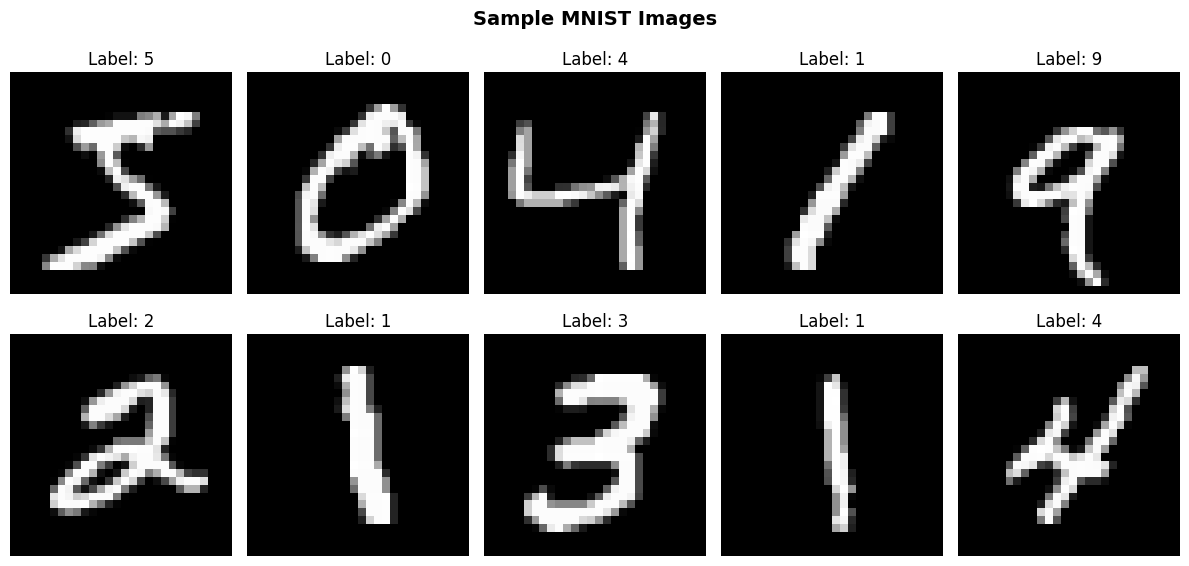

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}', fontsize=12)
    axes[row, col].axis('off')

plt.suptitle('Sample MNIST Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Reshape and normalize**

In [5]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Data range: [{x_train.min():.2f}, {x_train.max():.2f}]")

Training data shape: (60000, 784)
Training labels shape: (60000,)
Data range: [0.00, 1.00]


**Build Sequential model**

In [6]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden1'),
    layers.Dropout(0.25, name='dropout1'),
    layers.Dense(64, activation='relu', name='hidden2'),
    layers.Dropout(0.25, name='dropout2'),
    layers.Dense(10, activation='softmax', name='output')
], name='MINST_Model')


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "MINST_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

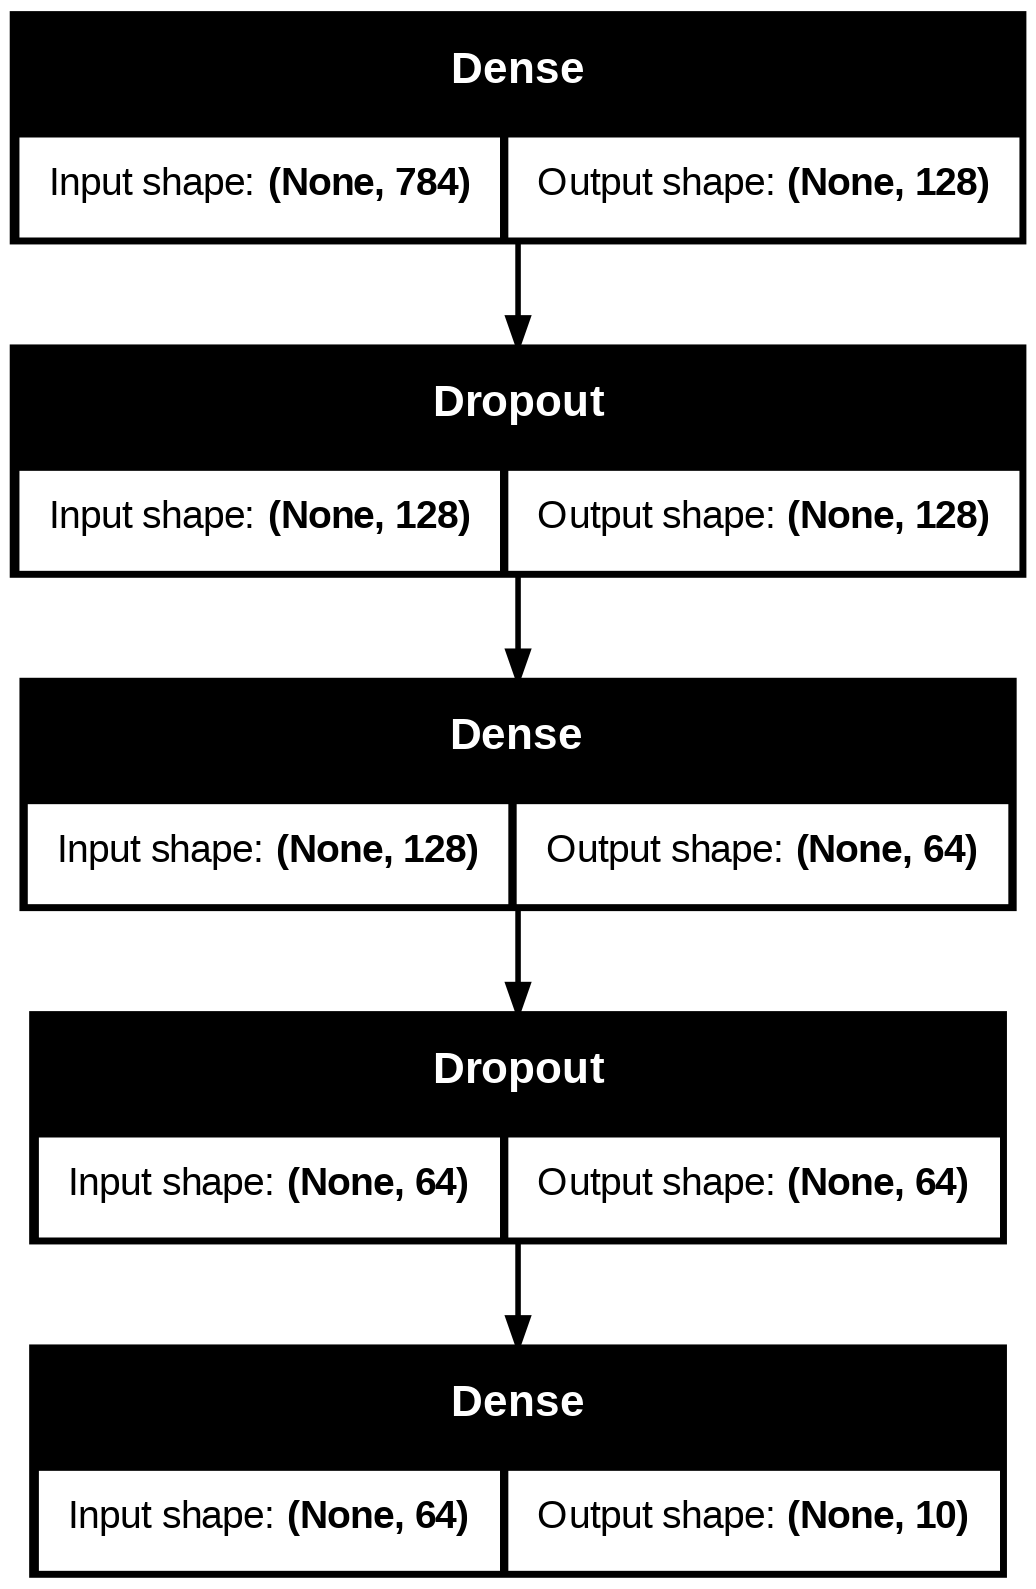

In [8]:
keras.utils.plot_model(model, show_shapes=True)

**Define callbacks**

In [9]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    keras.callbacks.TensorBoard(
        histogram_freq=1
    )
]

**Train model**

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/15
366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.8902
Epoch 1: val_loss improved from inf to 0.19386, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7224 - loss: 0.8808 - val_accuracy: 0.9420 - val_loss: 0.1939 - learning_rate: 0.0010
Epoch 2/15
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9206 - loss: 0.2658
Epoch 2: val_loss improved from 0.19386 to 0.14667, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9208 - loss: 0.2654 - val_accuracy: 0.9588 - val_loss: 0.1467 - learning_rate: 0.0010
Epoch 3/15
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9441 - loss: 0.1946
Epoch 3: val_loss improved from 0.14667 to 0.12516, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9441 - loss: 0.1943 - val_accuracy: 0.9618 - val_loss: 0.1252 - learning_rate: 0.0010
Epoch 4/15
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1568
Epoch 4: val_loss improved from 0.12516 to 0.10783, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9530 - loss: 0.1567 - val_accuracy: 0.9705 - val_loss: 0.1078 - learning_rate: 0.0010
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9595 - loss: 0.1378
Epoch 5: val_loss improved from 0.10783 to 0.10092, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9595 - loss: 0.1378 - val_accuracy: 0.9712 - val_loss: 0.1009 - learning_rate: 0.0010
Epoch 6/15
367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1189
Epoch 6: val_loss improved from 0.10092 to 0.09581, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9623 - loss: 0.1189 - val_accuracy: 0.9728 - val_loss: 0.0958 - learning_rate: 0.0010
Epoch 7/15
362/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.1054
Epoch 7: val_loss improved from 0.09581 to 0.09566, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9681 - loss: 0.1054 - val_accuracy: 0.9733 - val_loss: 0.0957 - learning_rate: 0.0010
Epoch 8/15
364/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9701 - loss: 0.0993
Epoch 8: val_loss improved from 0.09566 to 0.09270, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.0993 - val_accuracy: 0.9737 - val_loss: 0.0927 - learning_rate: 0.0010
Epoch 9/15
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.0945
Epoch 9: val_loss improved from 0.09270 to 0.08831, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9709 - loss: 0.0945 - val_accuracy: 0.9744 - val_loss: 0.0883 - learning_rate: 0.0010
Epoch 10/15
359/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9739 - loss: 0.0822
Epoch 10: val_loss improved from 0.08831 to 0.08520, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9740 - loss: 0.0822 - val_accuracy: 0.9752 - val_loss: 0.0852 - learning_rate: 0.0010
Epoch 11/15
367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.0753
Epoch 11: val_loss improved from 0.08520 to 0.08309, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9767 - loss: 0.0754 - val_accuracy: 0.9766 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 12/15
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.0725
Epoch 12: val_loss improved from 0.08309 to 0.08035, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0725 - val_accuracy: 0.9768 - val_loss: 0.0804 - learning_rate: 0.0010
Epoch 13/15
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0666
Epoch 13: val_loss did not improve from 0.08035
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0667 - val_accuracy: 0.9767 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 14/15
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0632
Epoch 14: val_loss did not improve from 0.08035

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9806 - loss: 0.0632 - val_accuracy: 0.9777 - val_loss: 0.0837 - learning_rate: 0.0010
Epoch 15/15
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.0504
Epoch 15: val_loss improved from 0.08035 to 0.07961, saving model to best_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0504 - val_accuracy: 0.9792 - val_loss: 0.0796 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 15.


**Evaluate on test set**

In [11]:
test_loss_keras, test_acc_keras = model.evaluate(x_test, y_test, verbose=0)

print(f"\nKeras Model Results:")
print(f"Test Loss: {test_loss_keras:.4f}")
print(f"Test Accuracy: {test_acc_keras:.4f}")


Keras Model Results:
Test Loss: 0.0748
Test Accuracy: 0.9791


**Plot training history**

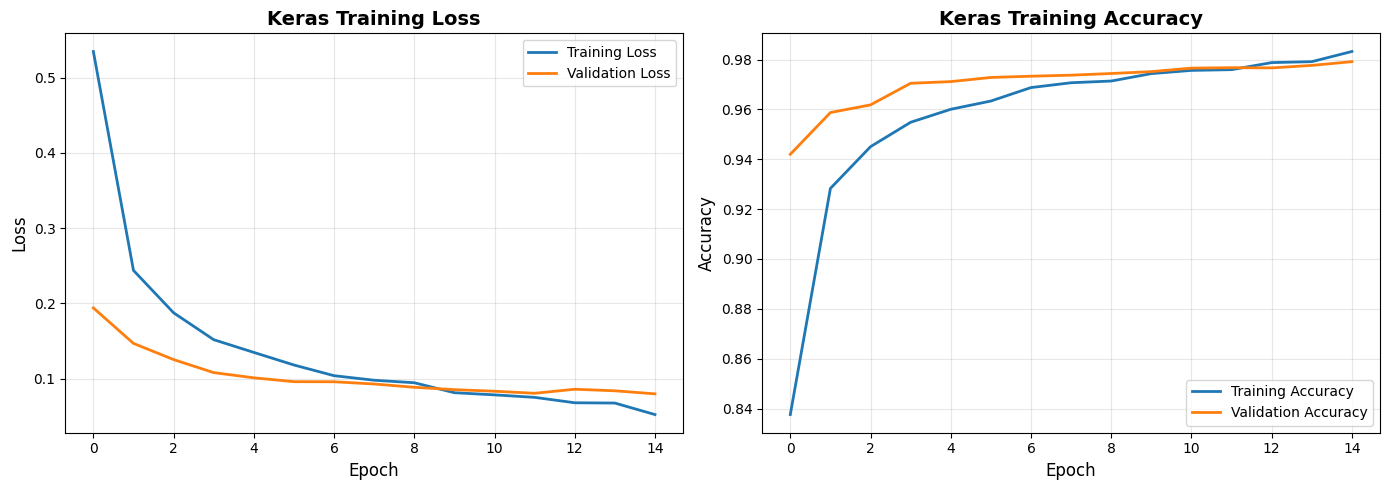

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Keras Training Loss', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Keras Training Accuracy', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Make predictions**

In [16]:
predictions = model.predict(x_test[:15])
predicted_class = np.argmax(predictions, axis=1)


for i in range(15):
    print(f"  Image {i}: True={y_test[i]}, Predicted={predicted_class[i]}, "
          f"Confidence={predictions[i][predicted_class[i]]:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
  Image 0: True=7, Predicted=7, Confidence=1.000
  Image 1: True=2, Predicted=2, Confidence=1.000
  Image 2: True=1, Predicted=1, Confidence=1.000
  Image 3: True=0, Predicted=0, Confidence=1.000
  Image 4: True=4, Predicted=4, Confidence=0.999
  Image 5: True=1, Predicted=1, Confidence=1.000
  Image 6: True=4, Predicted=4, Confidence=0.994
  Image 7: True=9, Predicted=9, Confidence=1.000
  Image 8: True=5, Predicted=5, Confidence=0.907
  Image 9: True=9, Predicted=9, Confidence=1.000
  Image 10: True=0, Predicted=0, Confidence=1.000
  Image 11: True=6, Predicted=6, Confidence=1.000
  Image 12: True=9, Predicted=9, Confidence=1.000
  Image 13: True=0, Predicted=0, Confidence=1.000
  Image 14: True=1, Predicted=1, Confidence=1.000
